Credits : https://www.kaggle.com/go1dfish/clear-mask-visualization-and-simple-eda

In [1]:
import pandas as pd
sample_submission = pd.read_csv("../input/severstal-steel-defect-detection/sample_submission.csv")
train = pd.read_csv("../input/severstal-steel-defect-detection/train.csv")

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 101)
import os
print(os.listdir("../input"))
import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 15
import seaborn as sns
from collections import Counter
from PIL import Image
import math
from collections import defaultdict
from pathlib import Path
from tqdm import tqdm

['severstal-steel-defect-detection']


In [3]:
input_dir = "../input/severstal-steel-defect-detection/"

In [4]:
# read all text data
train_df = pd.read_csv("../input/severstal-steel-defect-detection/train.csv")
sample_df = pd.read_csv("../input/severstal-steel-defect-detection/sample_submission.csv")

In [5]:
train_df.head()

ImageId_ClassId                                      EncodedPixels
0  0002cc93b.jpg_1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0002cc93b.jpg_2                                                NaN
2  0002cc93b.jpg_3                                                NaN
3  0002cc93b.jpg_4                                                NaN
4  00031f466.jpg_1                                                NaN

In [6]:
sample_df.head()

ImageId_ClassId EncodedPixels
0  004f40c73.jpg_1           1 1
1  004f40c73.jpg_2           1 1
2  004f40c73.jpg_3           1 1
3  004f40c73.jpg_4           1 1
4  006f39c41.jpg_1           1 1

In [28]:
# First, check the number of each class
class_dict = defaultdict(int)

kind_class_dict = defaultdict(int)

no_defects_num = 0
defects_num = 0

for col in range(0, len(train_df), 4):
    img_names = [str(i).split("_")[0] for i in train_df.iloc[col:col+4, 0].values]
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError
    
    labels = train_df.iloc[col:col+4, 1]
#     print(img_names)
#     print("\n\n")
    if labels.isna().all():
        no_defects_num += 1
    else:
        defects_num += 1
        
    kind_class_dict[sum(labels.isna().values == False)] += 1
#     print(labels.isna().values == False)
#     print("\n\n")
    for idx, label in enumerate(labels.isna().values.tolist()):
#         print(idx, label)
        if label == False:
            class_dict[idx+1] += 1

[ True False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[ True False False False]



[False False False  True]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False  True  True]



[False False False  True]



[False False False False]



[ True  True False False]



[False False False  True]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False  True]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[ True  True F

[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False  True False False]



[False False False False]



[False False False False]



[ True False False False]



[False False False False]



[False False False False]



[ True False False False]



[False False  True False]



[False  True False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[ True False False False]



[False False  True False]



[False False  True  True]



[False False  

[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False  True]



[False False False False]



[ True False False False]



[ True False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False F

[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False F


[False False False False]



[False False  True False]



[ True False False False]



[False False  True False]



[ True  True False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False  True]



[False  True False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[ True False False False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[ True False False False]



[False False False False]



[False False False False]



[ True False False False]



[False False  True False]



[ True  True False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False  True 




[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True  True]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False  True False False]



[False False False False]



[False False False False]



[ True  True False False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[ True False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True  True]



[False False  True False]



[False False  True False]



[False Fals

[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True  True]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False  True False]



[False False F




[False False  True False]



[False False  True False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False  True]



[ True False False False]



[ True False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[ True False False False]



[False False False False]



[False False  True False]



[ True False False False]



[False False False False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False False]



[False False  True False]



[False False False False]



[False Fals

[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True  True]



[False False  True False]



[ True False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True  True]



[False False False False]



[False False False False]



[False False  True False]



[False  True False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False  True False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False F




[False False  True False]



[False False False  True]



[False False  True False]



[False False False  True]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False False]



[False False  True False]



[False False False  True]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False  True]



[False False False False]



[False False  True False]



[False Fals

[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False  True]



[False False  True False]



[False False False False]



[False False  True  True]



[False False False False]



[ True False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  




[False False False False]



[False False False False]



[False False False False]



[False False  True  True]



[False False  True False]



[False  True False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True  True]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False  True]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False Fals




[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False  True]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True  True]



[False False False False]



[False False False False]



[ True False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False False]



[False Fals




[False False  True  True]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[ True False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False  True False False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False False]



[False False  True  True]



[False False False False]



[ True False False False]



[False  True False False]



[False False False False]



[False False False False]



[False False  True False]



[False Fals

[False False  True  True]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False  True  True]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[ True False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  


[False False False False]



[False False  True False]



[False False False  True]



[False False  True False]



[ True False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False  True]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False  True]



[False False  True False]



[False False  True False]



[False False False  True]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False 

[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False  True]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False  True]



[False False  True  True]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False  True False False]



[False False False  True]



[False False False False]



[False False F




[False False False False]



[False False False False]



[False False  True False]



[ True False False False]



[False False False False]



[False False False False]



[False  True  True False]



[False False  True False]



[False False False False]



[False False  True  True]



[False False False False]



[False False False False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False Fals

[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[ True False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False  True]



[False False  True False]



[False False False  True]



[ True False  True False]



[False False False False]



[False False False False]



[False False F

[False False  True  True]



[False False False False]



[False  True False False]



[False False  True False]



[False False False  True]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[ True False False False]



[ True False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False False False]



[False False False False]



[ True False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False F

[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[ True False False False]



[False False  True False]



[False False  True False]



[False  True False False]



[False False  True False]



[False  True False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False  True]



[False False  True False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False  True]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  

[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False  True]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True  True]



[ True False False False]



[False False False False]



[ True False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[ True False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True  True]



[False False False False]



[False False  True False]



[False False  True False]



[False False False  True]



[False False  True False]



[False False False False]



[False False False False]



[ True False False False]



[False False  True False]



[False False False False]



[False False  




[ True False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True  True]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True  True]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False  True]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[ True Fals

[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[ True False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[ True False  True False]



[False False  True False]



[False False False False]



[False False  True  True]



[False False False  True]



[ True False  True False]



[False False False False]



[False False False False]



[False False  True  True]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[ True False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False F




[False False False False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[ True  True False False]



[False False  True False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False  True]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False Fals


[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True  True]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False  True]



[False False False False]



[False False  True False]



[False False False False]



[ True False False False]



[ True False False False]



[False False 




[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[ True False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False  True False]



[ True False False False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False  True]



[False False False False]



[False Fals




[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True  True]



[False False False False]



[False False False False]



[ True False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[ True False False False]



[False False False False]



[False False  True False]



[False Fals


[ True False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[ True False False False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False  True False False]



[False False  True False]



[False False False False]



[False  True False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False False False]



[False  True False False]



[False False False False]



[False False False False]



[False False  True  True]



[False False 

[False False False False]



[False False False False]



[False False False False]



[False False False  True]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False False False]



[False False  True False]



[False False  True False]



[ True False False False]



[False False  True False]



[False False False False]



[ True False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False  True False]



[ True False False False]



[False False False False]



[False False False False]



[False False False False]



[False False False False]



[False False  True False]



[False False False False]



[False False  True False]



[False False  True False]



[False False False False]



[False  True  True False]



[False False False False]



[False False False False]



[False False  

In [8]:
print("the number of images with no defects: {}".format(no_defects_num))
print("the number of images with defects: {}".format(defects_num))

the number of images with no defects: 5902
the number of images with defects: 6666


defaultdict(int, {1: 897, 3: 5150, 4: 801, 2: 247})

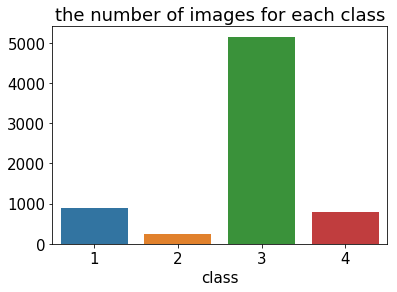

In [9]:
fig, ax = plt.subplots()
sns.barplot(x=list(class_dict.keys()), y=list(class_dict.values()), ax=ax)
ax.set_title("the number of images for each class")
ax.set_xlabel("class")
class_dict

1. There are similar numbers of images with and without defects.
2. class is imbalanced

defaultdict(int, {1: 6239, 0: 5902, 2: 425, 3: 2})

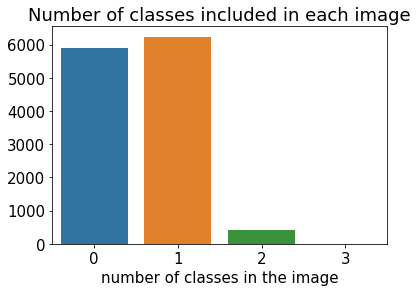

In [10]:
# How many classes do each image have
fig, ax = plt.subplots()
sns.barplot(x=list(kind_class_dict.keys()), y=list(kind_class_dict.values()), ax=ax)
ax.set_title("Number of classes included in each image");
ax.set_xlabel("number of classes in the image")
kind_class_dict

* most images have no deffect or one kind of defect

In [11]:
# check the image data

# train image size
train_size_dict = defaultdict(int)
train_path = Path("../input/severstal-steel-defect-detection/train_images/")

for img_name in train_path.iterdir():
    img = Image.open(img_name)
    train_size_dict[img.size] += 1
    
print(train_size_dict)

defaultdict(<class 'int'>, {(1600, 256): 12568})


In [12]:
# text image size
test_size_dict = defaultdict(int)
test_path = Path("../input/severstal-steel-defect-detection/test_images/")

for img_name in test_path.iterdir():
    img = Image.open(img_name)
    test_size_dict[img.size] += 1
    
print(test_size_dict)

defaultdict(<class 'int'>, {(1600, 256): 1801})


* All images have same shape

**Visualization of Masks**

In [13]:
palet = [(249,192,12), (0,185,241), (114,0,218), (249,50,12)]

In [14]:
def name_and_mask(start_idx):
    col = start_idx
    img_names = [str(i).split("_")[0] for i in train_df.iloc[col:col+4, 0].values]
    
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError
        
    labels = train_df.iloc[col:col+4, 1]
    mask = np.zeros((256, 1600, 4), dtype=np.uint8)
    
    for idx, label in enumerate(labels.values):
        if label is not np.nan:
            mask_label = np.zeros(1600*256, dtype=np.uint8)
            label = label.split(" ")
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            for pos, le in zip(positions, length):
                mask_label[pos-1:pos+le-1] = 1
            mask[:, :, idx] = mask_label.reshape(256, 1600, order='F')
    
    return img_names[0], mask 

In [15]:
def show_mask_image(col):
    name, mask = name_and_mask(col)
    img = cv2.imread(str(train_path/name))
    fig, ax = plt.subplots(figsize=(15,15))
    
    for ch in range(4):
        contours, _ = cv2.findContours(mask[:,:,ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for i in range(0, len(contours)):
            cv2.polylines(img, contours[i], True, palet[ch], 2)
            
    ax.set_title(name)
    ax.imshow(img)
    plt.show()

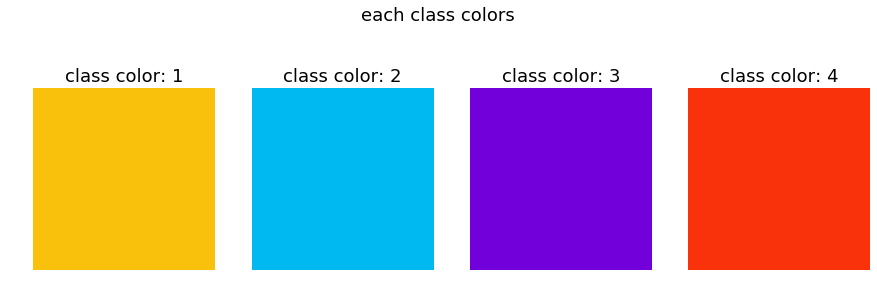

In [16]:
fig, ax = plt.subplots(1,4, figsize=(15,5))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((50,50,3), dtype=np.uint8) * palet[i])
    ax[i].set_title("class color: {}".format(i+1))
fig.suptitle("each class colors")
    
plt.show()

In [17]:
idx_no_deffect = []
idx_class_1 = []
idx_class_2 = []
idx_class_3 = []
idx_class_4 = []
idx_class_multi = []
idx_class_tripple = []

for col in range(0, len(train_df), 4):
    img_names = [str(i).split("_")[0] for i in train_df.iloc[col:col+4, 0].values]
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError
        
    labels = train_df.iloc[col:col+4, 1]
    if labels.isna().all():
        idx_no_deffect.append(col)
    elif (labels.isna() == [False, True, True, True]).all():
        idx_class_1.append(col)
    elif (labels.isna() == [True, False, True, True]).all():
        idx_class_2.append(col)
    elif (labels.isna() == [True, True, False, True]).all():
        idx_class_3.append(col)
    elif (labels.isna() == [True, True, True, False]).all():
        idx_class_4.append(col)
    elif (labels.isna().sum() == 1):
          idx_class_tripple.append(col)
    else:
          idx_class_multi.append(col)

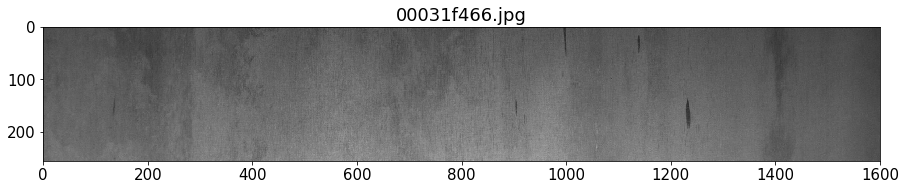

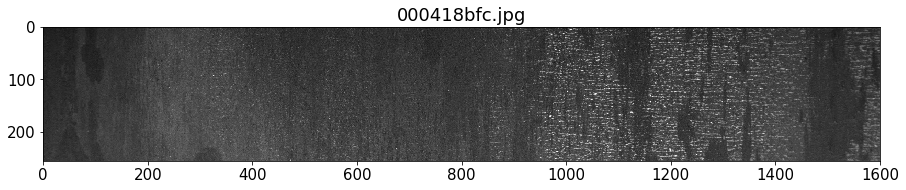

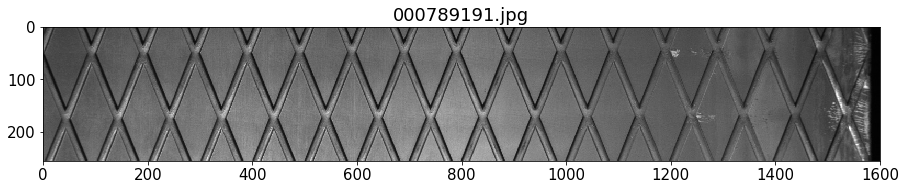

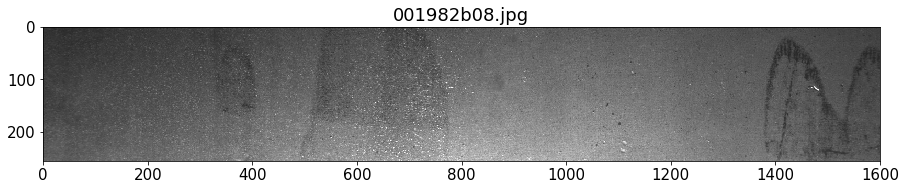

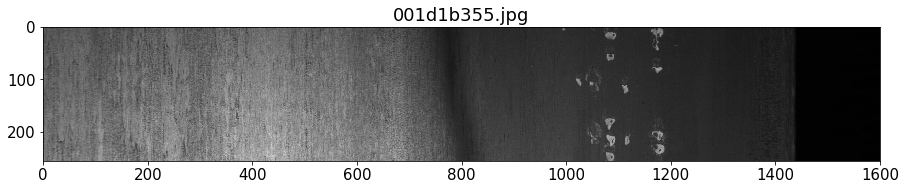

In [18]:
# images with no deffect
for idx in idx_no_deffect[:5]:
    show_mask_image(idx)

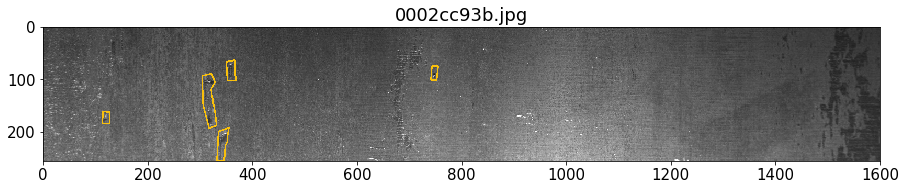

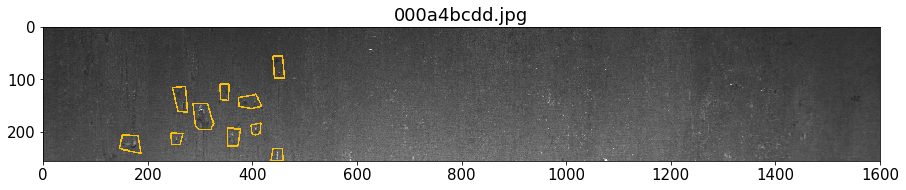

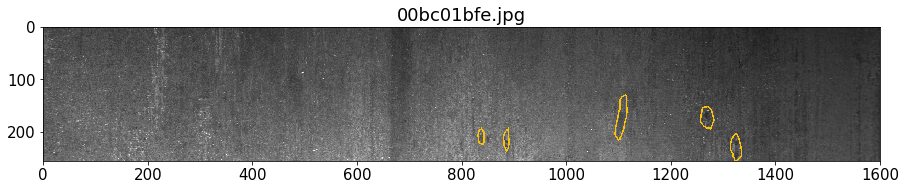

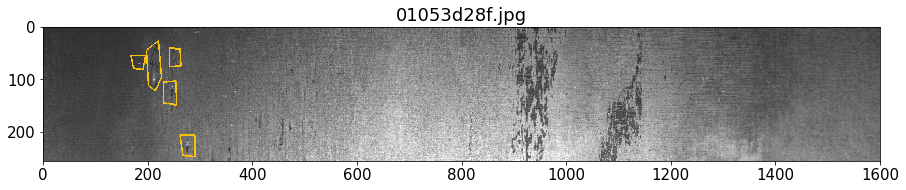

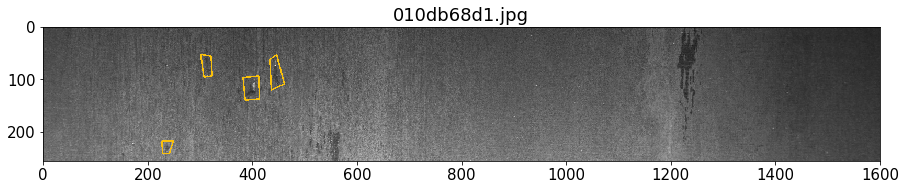

In [19]:
# images with deffect Label 1
for idx in idx_class_1[:5]:
    show_mask_image(idx)

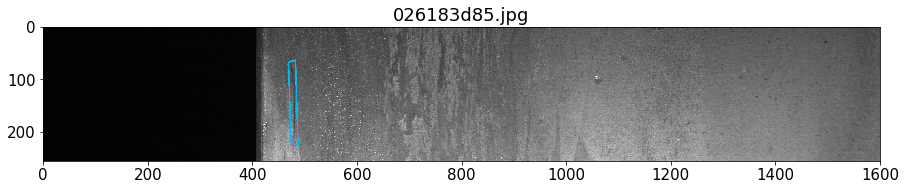

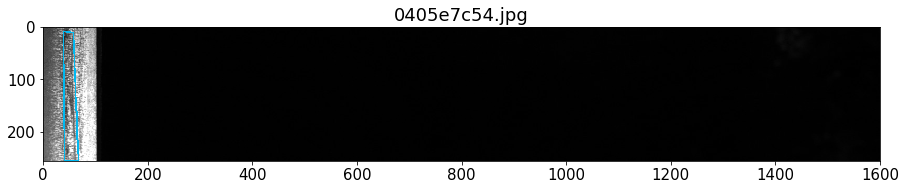

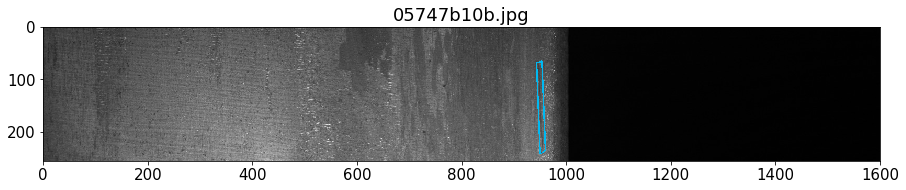

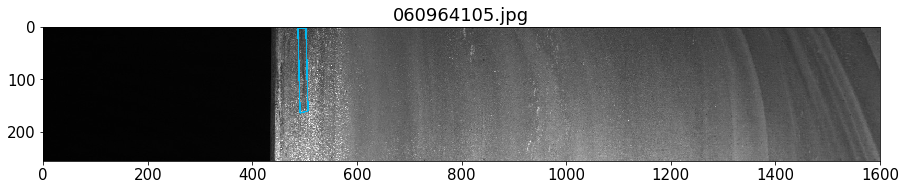

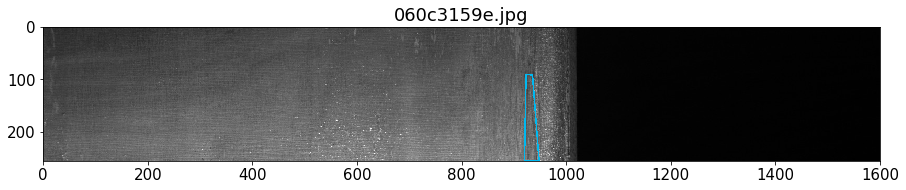

In [20]:
# images with deffect Label 2
for idx in idx_class_2[:5]:
    show_mask_image(idx)

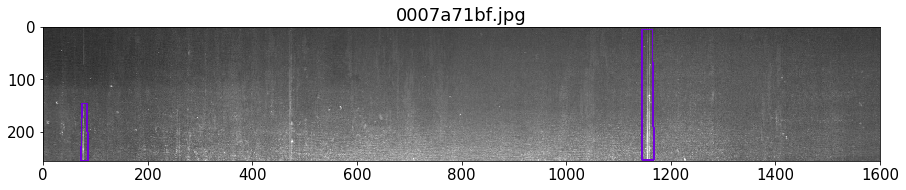

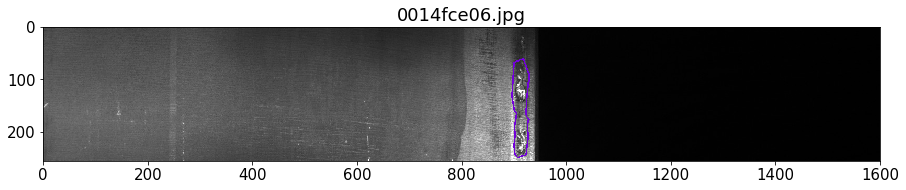

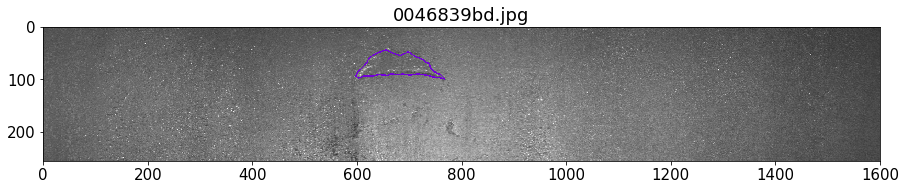

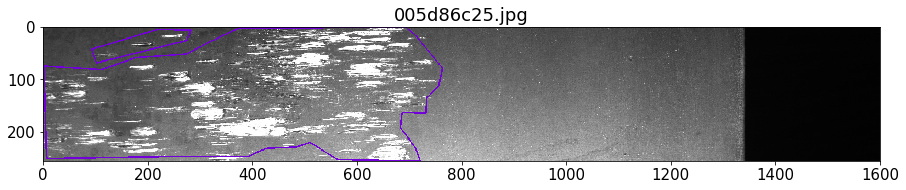

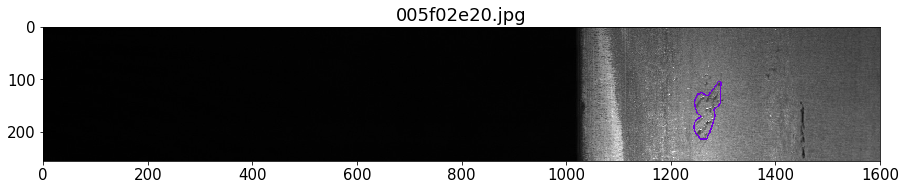

In [21]:
# images with deffect Label 3
for idx in idx_class_3[:5]:
    show_mask_image(idx)

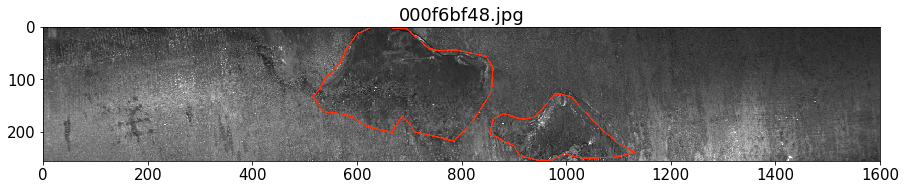

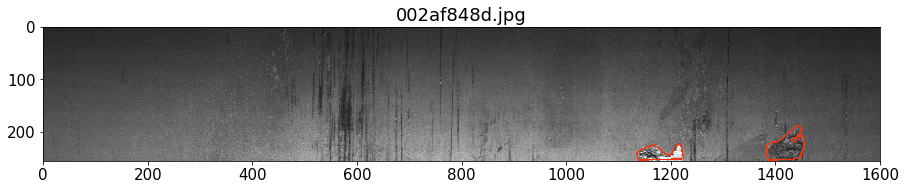

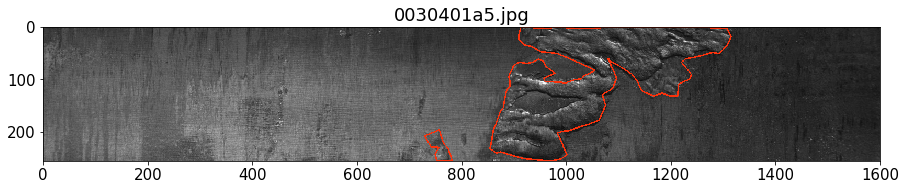

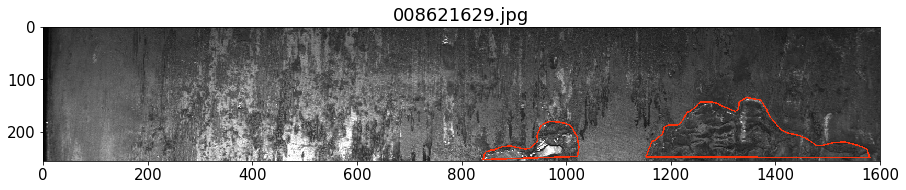

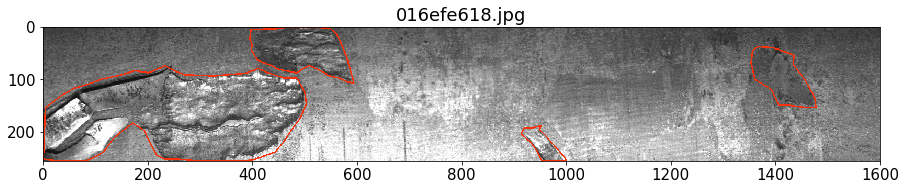

In [22]:
# images with deffect Label 4
for idx in idx_class_4[:5]:
    show_mask_image(idx)

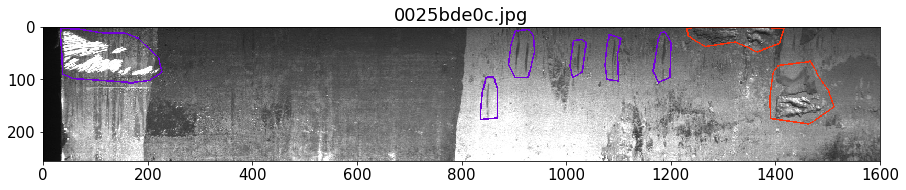

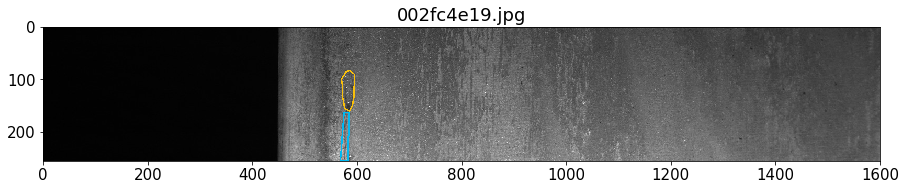

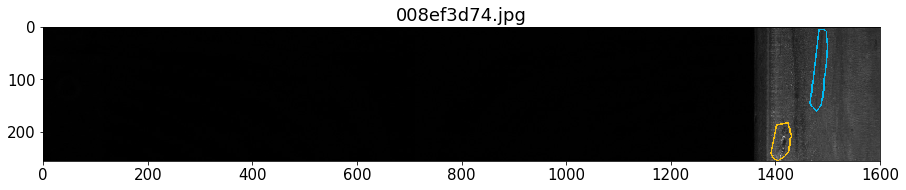

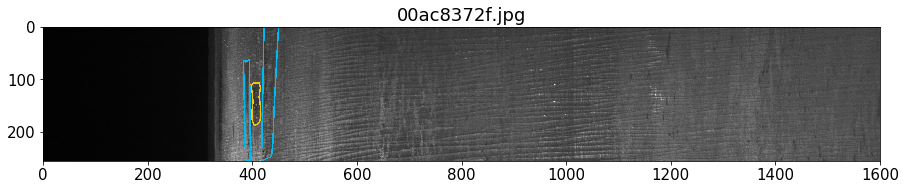

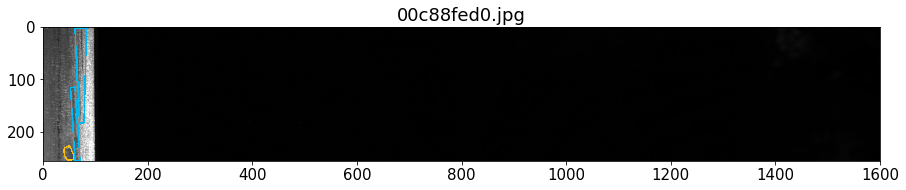

In [23]:
# images with deffect contain multi Label 
for idx in idx_class_multi[:5]:
    show_mask_image(idx)

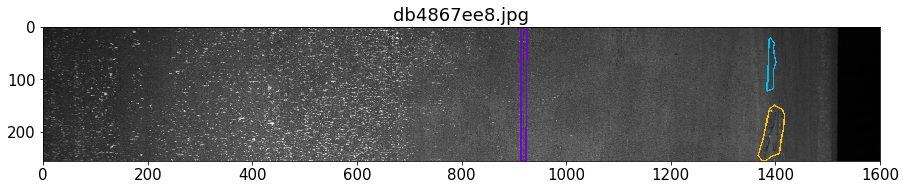

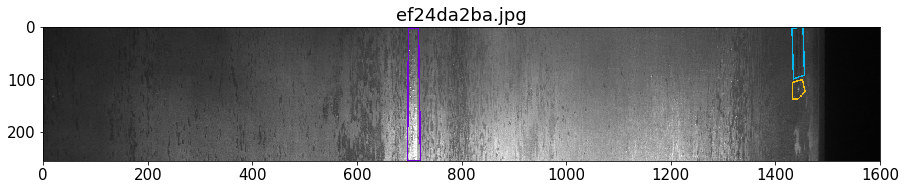

In [24]:
# images with deffect contain tripple labels
for idx in idx_class_tripple:
    show_mask_image(idx)